<a href="https://colab.research.google.com/github/maahi902/MiniProject/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

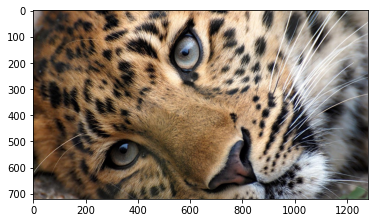

In [3]:
img = plt.imread('/content/drive/MyDrive/dataset/leopard/3.jpg')
plt.imshow(img)

Prepocessing of data

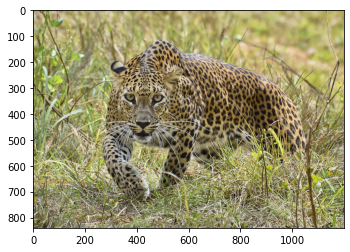

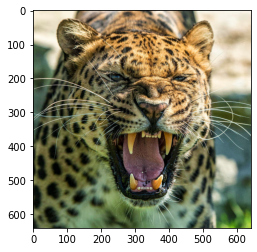

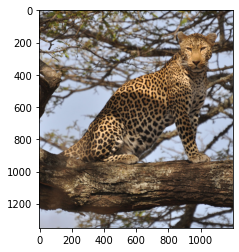

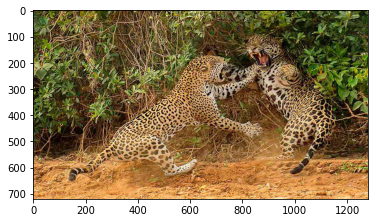

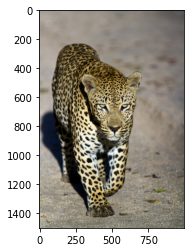

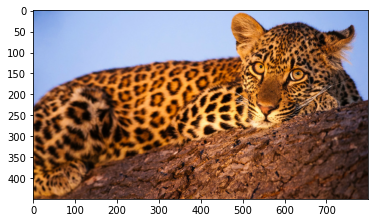

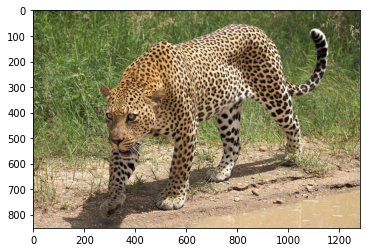

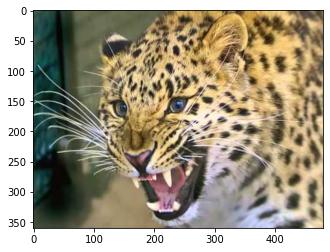

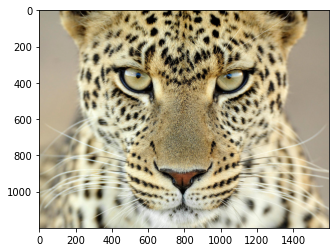

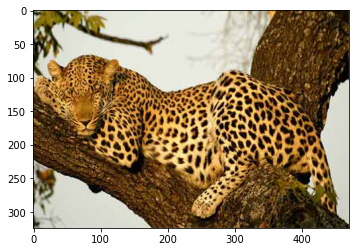

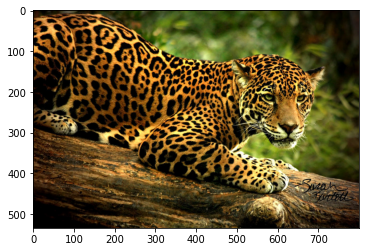

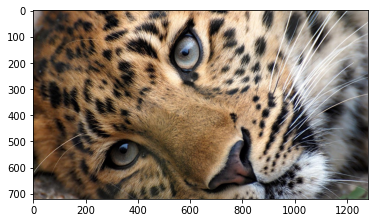

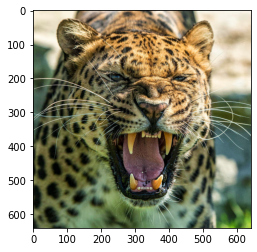

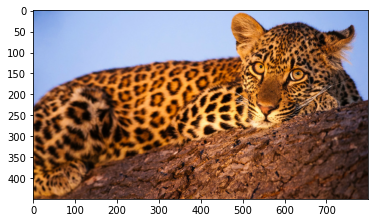

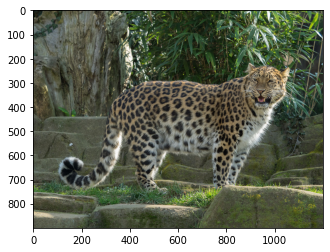

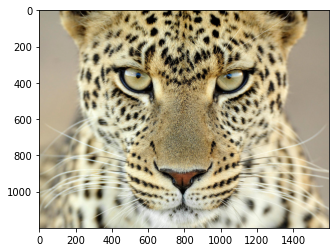

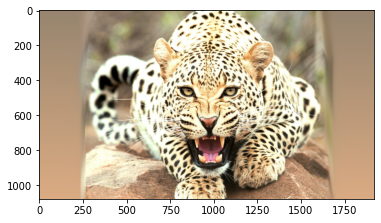

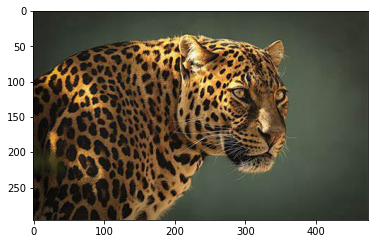

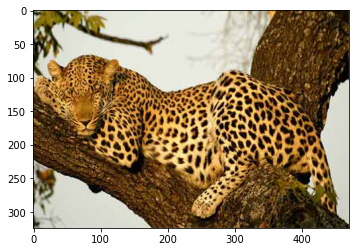

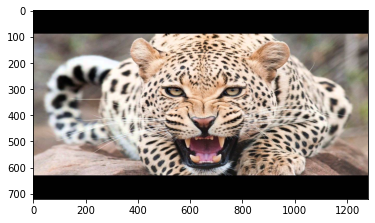

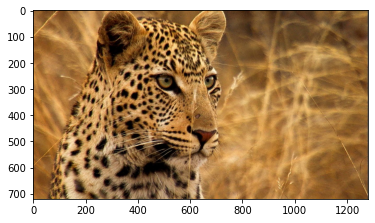

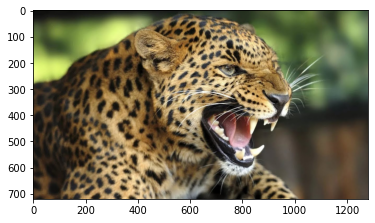

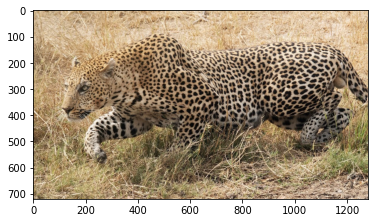

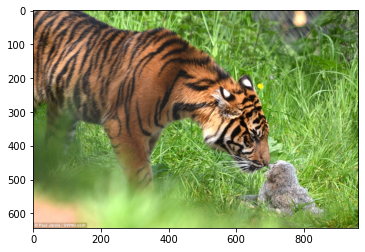

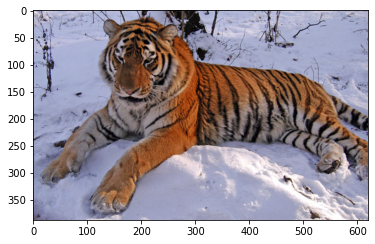

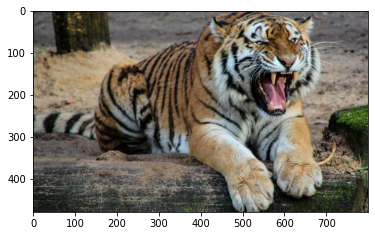

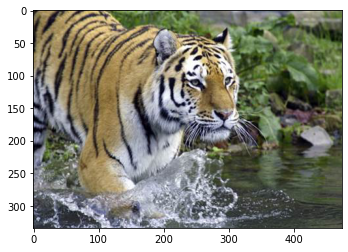

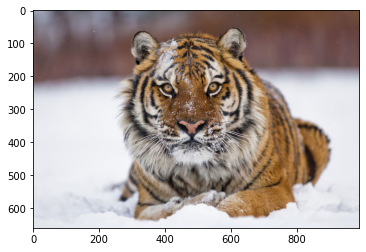

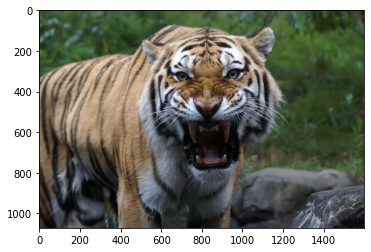

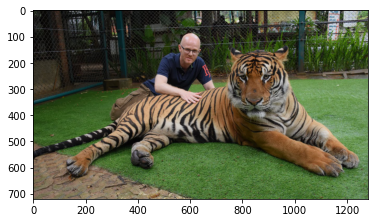

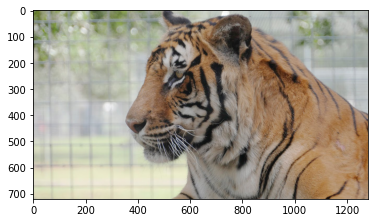

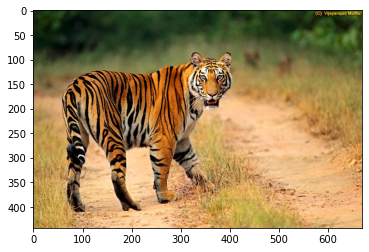

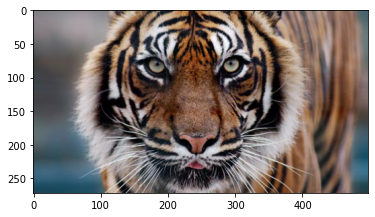

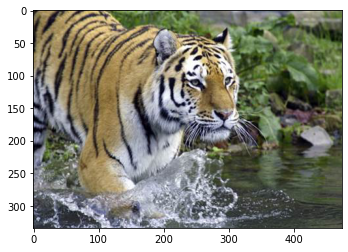

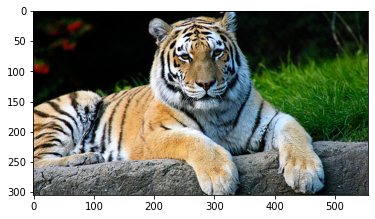

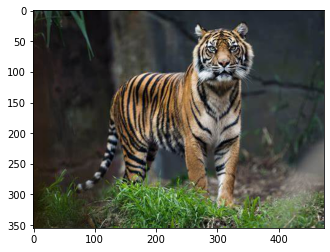

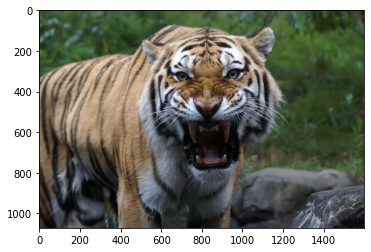

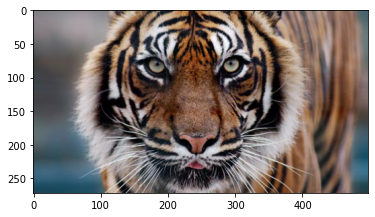

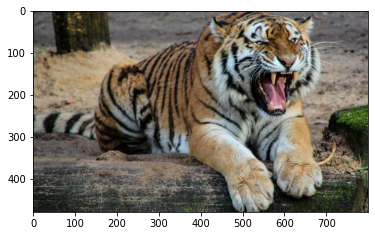

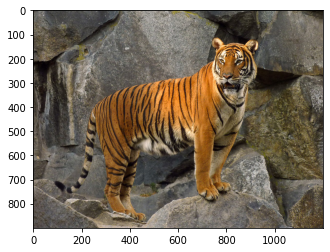

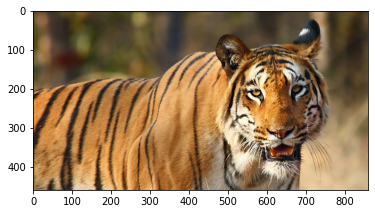

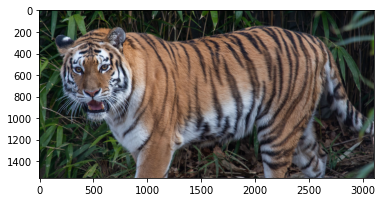

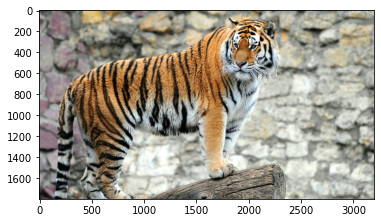

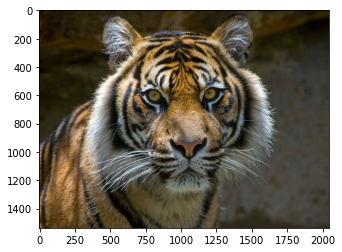

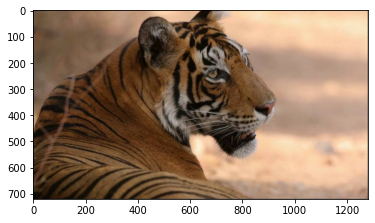

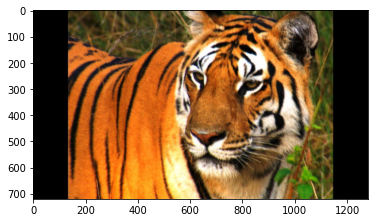

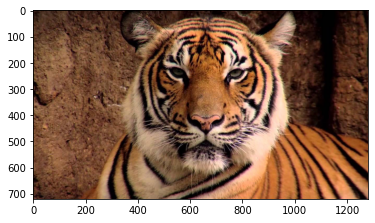

In [5]:
import os
import numpy as np
datadir = '/content/drive/MyDrive/dataset/'

categories = ['leopard','tiger'] # Name the folder with these categories
target = []
flat_data = []

for i in categories:
  path = os.path.join(datadir,i)
  #print(path)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    plt.imshow(img_array)
    plt.show()
    img_resize = resize(img_array,(150,150,3)) # Value gets converted 0-1 from 0-255
    flat_data.append(np.ndarray.flatten(img_resize))
    target.append(i)

flat_data = np.array(flat_data)
target = np.array(target)

In [6]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df.head()

0         1         2  ...     67498     67499   Target
0  0.694706  0.654118  0.441765  ...  0.581961  0.447059  leopard
1  0.964706  0.945098  0.866667  ...  0.826013  0.235429  leopard
2  0.590196  0.588235  0.613725  ...  0.476471  0.535294  leopard
3  0.371020  0.289281  0.140562  ...  0.575033  0.281216  leopard
4  0.633333  0.613725  0.572549  ...  0.423529  0.340523  leopard

[5 rows x 67501 columns]

In [7]:
df['Target'].value_counts()

tiger      24
leopard    23
Name: Target, dtype: int64

In [8]:
x = flat_data
y = target

Splitting Of Data

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

SVM : Support Vector Machine

In [10]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
y_pred_svm = model.predict(x_test)

Accuracy & Confusion Matrix 

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [13]:
accuracy_score(y_pred_svm,y_test)

0.6666666666666666

In [15]:
cm_svm = confusion_matrix(y_pred_svm,y_test)
cm_svm

array([[3, 2],
       [2, 5]])

In [17]:
print(classification_report(y_pred_svm,y_test))

              precision    recall  f1-score   support

     leopard       0.60      0.60      0.60         5
       tiger       0.71      0.71      0.71         7

    accuracy                           0.67        12
   macro avg       0.66      0.66      0.66        12
weighted avg       0.67      0.67      0.67        12



Hyperparameter Tuning

In [18]:
from sklearn.model_selection import GridSearchCV
model = SVC()
param = {
    'kernel':['linear','poly','rbf'],
      'C' : [0.1,1,10,100]
}

grid = GridSearchCV(model,param,cv= 5)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 0.1, 'kernel': 'poly'}

In [19]:
grid.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
grid_pred_svm = grid.predict(x_test)

In [21]:
accuracy_score(y_test, grid_pred_svm)

0.75

In [22]:
print(classification_report(y_test, grid_pred_svm))

              precision    recall  f1-score   support

     leopard       1.00      0.40      0.57         5
       tiger       0.70      1.00      0.82         7

    accuracy                           0.75        12
   macro avg       0.85      0.70      0.70        12
weighted avg       0.82      0.75      0.72        12

